### Overview

This project is all about applying multiple regression modeling techniques in real estate business. It helps to understand and address practical challenges while making the decision in real estate business.

The main goals include learning how different features affect home or property prices, supporting decision-making, developing data science skills, and deciphering model outputs.

### Dataset Summary

The dataset provides a sizable sample of 21,597 entries for analysis and includes real estate transactions in King County, Washington, USA, between 2014 and 2015. It includes a variety of property characteristics, location information, property state, and historical data. Notably, a deliberate feature selection process was used to optimize the predictive model rather than using all available features in the analysis. In order to give users useful information for making informed investment decisions, the emphasis is on identifying the factors that have the greatest influence on real estate prices.

The King County real estate market can be better understood with the help of this dataset, which also equips users to make informed decisions. Despite the selective use of features, the project is committed to achieving the best outcomes by utilizing the selected variables to deliver a robust and educational solution for investors, builders, and homebuyers looking to succeed in the competitive King County real estate market.

---
# King County Real Estate Pricing and Investment Advisor

### Business Problem

The dynamic real estate market in King County, Washington presents a significant challenge that is addressed by the "King County Real Estate Pricing and Investment Advisor" project. Understanding the numerous variables that affect real estate prices is of utmost importance in the quest for well-informed investment choices. By utilizing a powerful regression analysis that explores the intricate nature of real estate dynamics in King County, the project seeks to solve this mystery. 

The real estate market in King County is diverse and volatile, making it crucial for investors, developers, and homebuyers to have access to trustworthy insights. The outcomes of the regression analysis provide a clear path toward this goal. While many variables affect property prices, it is noteworthy that living space, waterfront views, property condition, grade, and year of construction emerge as key determinants.

The main goal of the project is to offer a thorough "King County Real Estate Pricing and Investment Advisor" model, supported by regression analysis, which provides useful information about these crucial variables. As a result, stakeholders are better equipped to confidently navigate this complex market, make wise investment decisions, and develop plans for fruitful real estate endeavors. This solution creates the ideal environment for thriving in King County's dynamic real estate market by perfectly addressing the need for data-driven decision-making.


### Feature Columns
- id - Unique ID for each home sold
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- yr_built - The year the house was initially built

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

### Understanding the data

In [83]:
df  = pd.read_csv('data/kc_house_data.csv')

In [84]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [85]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

> Narrowing down the columns based on the Project 2 suggestions if you're feeling overwhelmed.

In [86]:
# Checking the data
data  = df[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built']]
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004


# Data Cleaning and Preparation

In [87]:
# Tracing the duplicates
data[data.duplicated(keep=False, subset=['id'])]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
93,6021501535,430000.0,3,1.50,1580,5000,1.0,0.0,3,8,1939
94,6021501535,700000.0,3,1.50,1580,5000,1.0,0.0,3,8,1939
313,4139480200,1380000.0,4,3.25,4290,12103,1.0,0.0,3,11,1997
314,4139480200,1400000.0,4,3.25,4290,12103,1.0,0.0,3,11,1997
324,7520000520,232000.0,2,1.00,1240,12092,1.0,NaN,3,6,1922
...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,502000.0,4,2.50,2680,5539,2.0,NaN,3,8,2013
20763,6300000226,240000.0,4,1.00,1200,2171,1.5,0.0,3,7,1933
20764,6300000226,380000.0,4,1.00,1200,2171,1.5,0.0,3,7,1933
21564,7853420110,594866.0,3,3.00,2780,6000,2.0,0.0,3,9,2013


In [88]:
# Removing duplicates and retaining the first row for each duplicate entry.
data = data.drop_duplicates(keep='first', subset=['id'])

In [89]:
#Changing the index to Id
data.set_index('id', drop=True, append=False, inplace=True)
data.index.name = None

In [90]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
291310100,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004


In [91]:
# Gathering the info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 7129300520 to 1523300157
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21420 non-null  float64
 1   bedrooms     21420 non-null  int64  
 2   bathrooms    21420 non-null  float64
 3   sqft_living  21420 non-null  int64  
 4   sqft_lot     21420 non-null  int64  
 5   floors       21420 non-null  float64
 6   waterfront   19067 non-null  float64
 7   condition    21420 non-null  int64  
 8   grade        21420 non-null  int64  
 9   yr_built     21420 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.8 MB


In [92]:
# Checking for Null values
data.isnull().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2353
condition         0
grade             0
yr_built          0
dtype: int64

In [93]:
#Investigating waterfront unique values
data['waterfront'].unique()

array([nan,  0.,  1.])

In [94]:
# There is only two which can be used to categorize property if there is waterfront or not
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [95]:
#filling NA as 0 and converting 'waterfront' to an integer as decimals are unnecessary
data['waterfront'] = data['waterfront'].fillna(0).astype(int)

In [96]:
data.shape

(21420, 10)

In [97]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,3.410784,7.662792,1971.092997
std,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.650035,1.171971,29.387141
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1952.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


In the first glance the max bedroom number looks like a false entry or an outlier

In [98]:
# Confirming the unusual value
data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [99]:
# There is an entry with 33 bedrooms which is very skeptic, checking details to understand and confirm
data[data['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
2402100895,640000.0,33,1.75,1620,6000,1.0,0,5,7,1947


In [100]:
# One house has 33 bedrooms and sqft_living of 1620. This is below the mean
# It is not possible for this house to have 33 bedrooms, possibly a typo error
data['bedrooms'] = data['bedrooms'].replace(33, 3)

In [101]:
# Confirming the changes
data[data['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built


**Continuous Variables vs Categorical Variables**

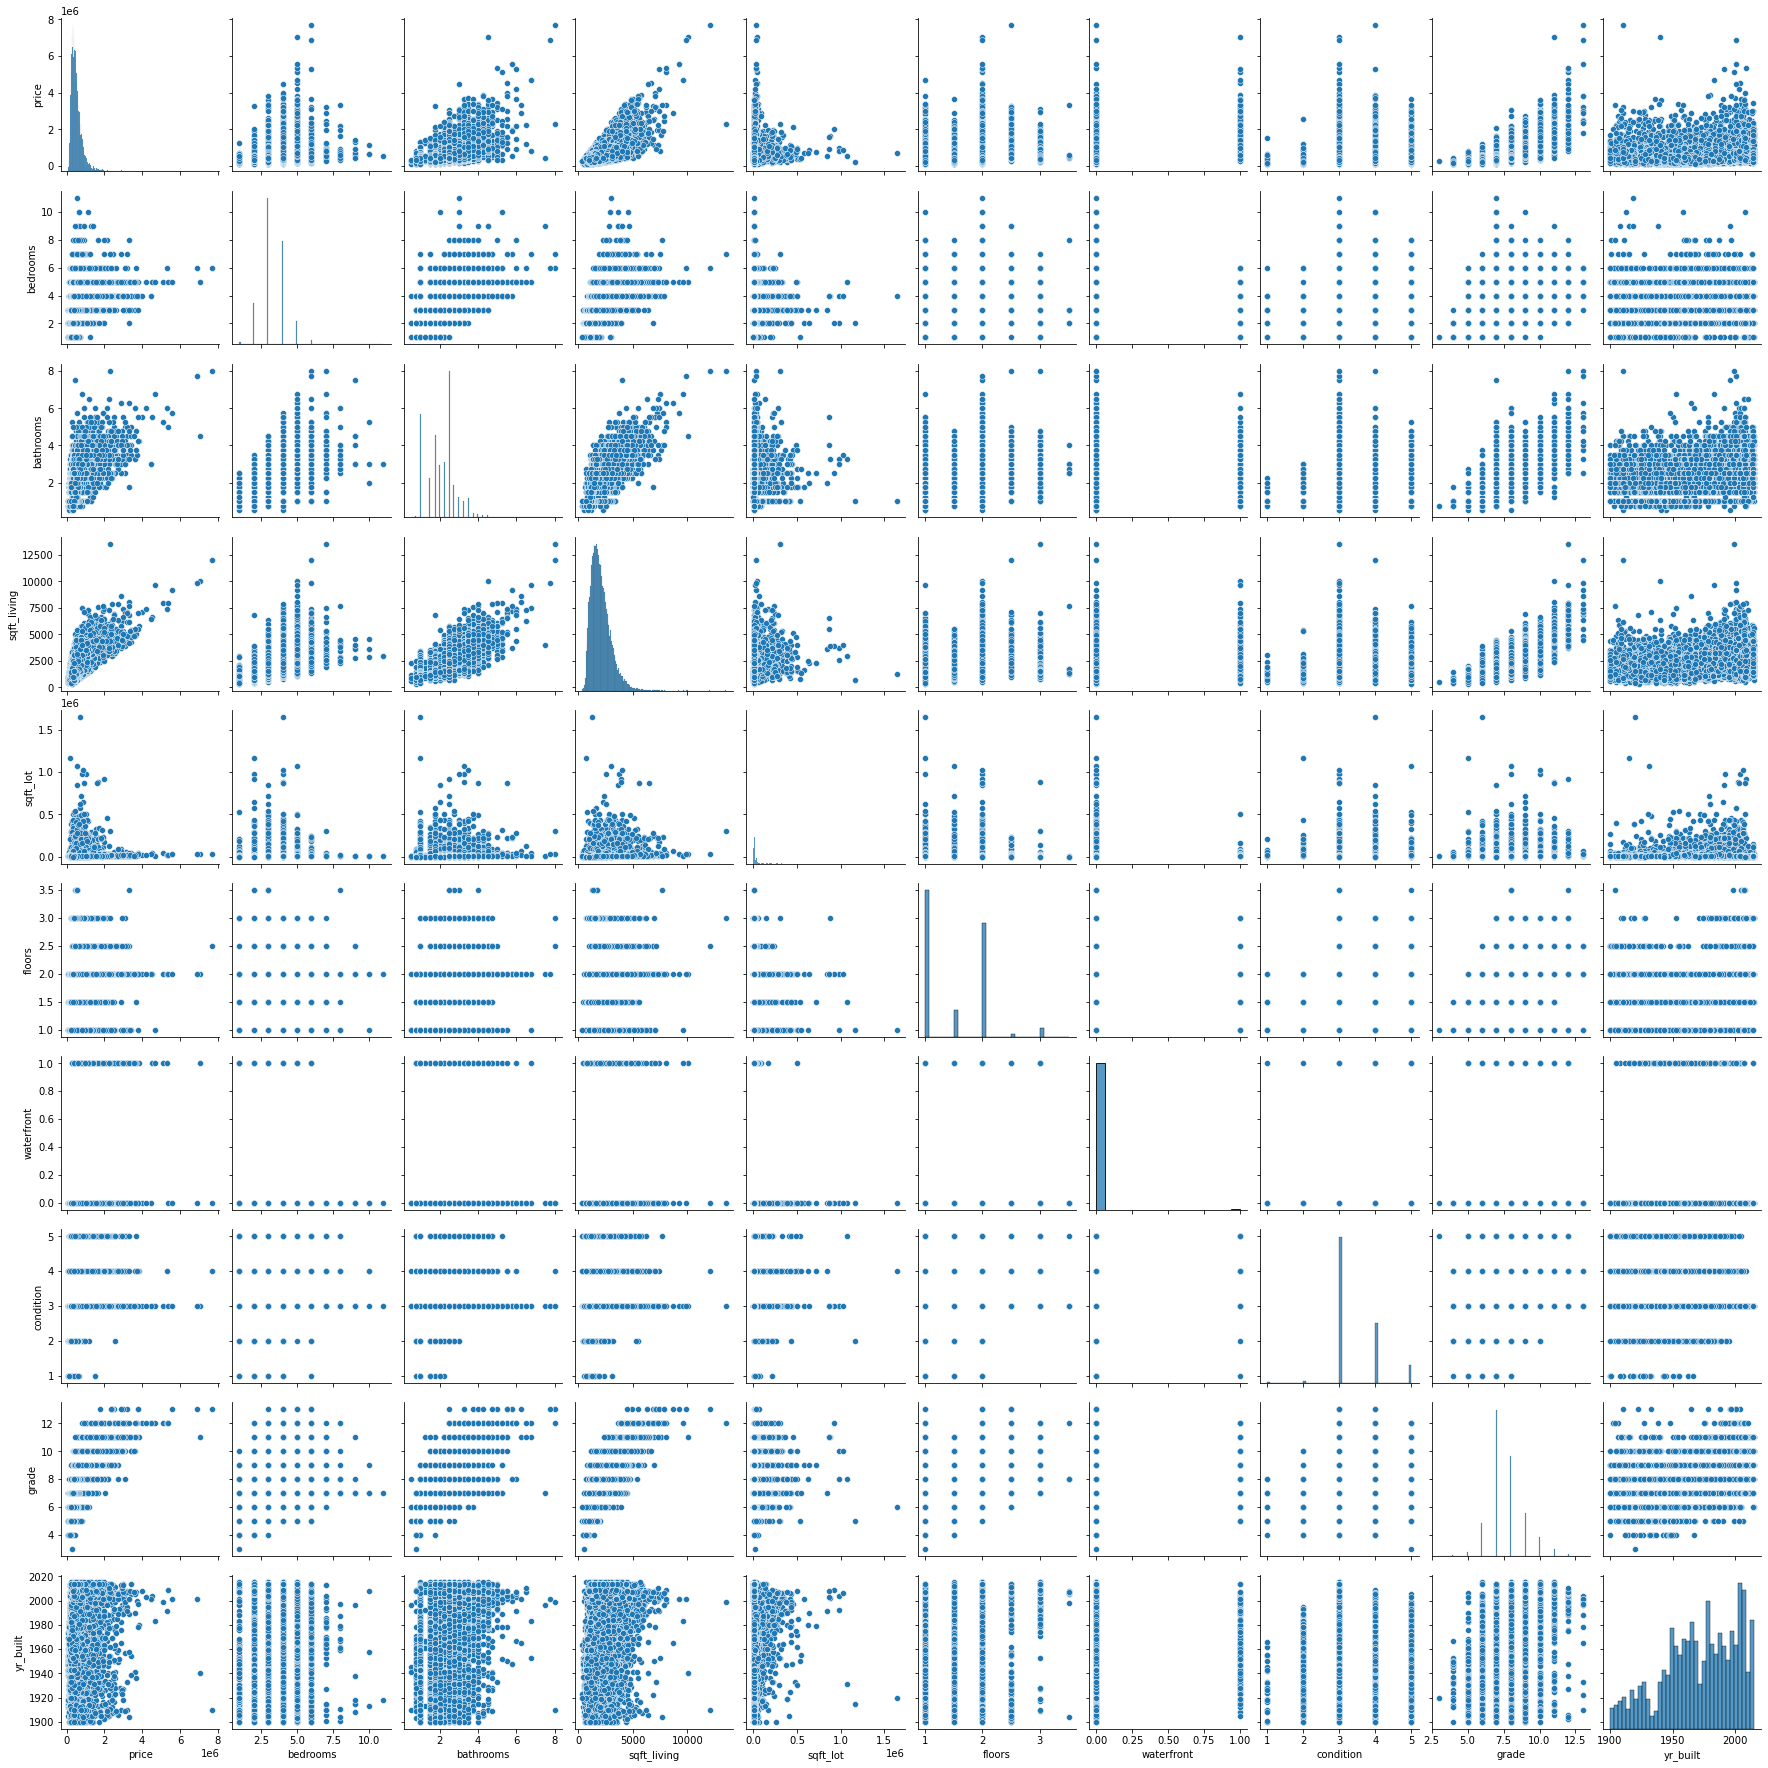

In [102]:
sns.pairplot(data);

In [103]:
data.nunique()

price          3607
bedrooms         11
bathrooms        29
sqft_living    1034
sqft_lot       9776
floors            6
waterfront        2
condition         5
grade            11
yr_built        116
dtype: int64

> Upon looking at the pair plot and values, we have the following:
>
> Continues variables:
>- price
>- sqft_living
>- sqft_lot
>
> Categorical variables:
>- bedrooms
>- bathrooms
>- floors
>- waterfront
>- condition
>- grade
>- yr_built

In [104]:
# The bathrooms column has too much categories which is unusual
data['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [105]:
# narrowing it down to whole numbers as decimal are not helpful for categorical variables
data['bathrooms'] = data['bathrooms'].round().astype(int)

In [106]:
data['bathrooms'].unique()

array([1, 2, 3, 4, 5, 6, 0, 7, 8])

In [107]:
# Same with the yr_built looks more and has more categories which can be binned down
unique_years = data['yr_built'].unique()
np.sort(unique_years)

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015])

In [110]:
# Narrowing it down to a 3 bins categorised by half century
# Convert yr_built;
# 1900 to 1950 = yr_1900-1950
# 1951 to 2000 = yr_1951-2000
# 2001 to 2015 = yr_2001-2015

def half_cent(year):
    if 1899 < year < 1951:
        return 1
    elif 1950 < year < 2000:
        return 2
    else: return 3

In [111]:
data['yr_built'] = data['yr_built'].apply(half_cent)

In [112]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
7129300520,221900.0,3,1,1180,5650,1.0,0,3,7,3
6414100192,538000.0,3,2,2570,7242,2.0,0,3,7,3
5631500400,180000.0,2,1,770,10000,1.0,0,3,6,3
2487200875,604000.0,4,3,1960,5000,1.0,0,5,7,3
1954400510,510000.0,3,2,1680,8080,1.0,0,3,8,3
...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2,1530,1131,3.0,0,3,8,3
6600060120,400000.0,4,2,2310,5813,2.0,0,3,8,3
1523300141,402101.0,2,1,1020,1350,2.0,0,3,7,3
291310100,400000.0,3,2,1600,2388,2.0,0,3,8,3


In [113]:
# rounding off floors
data['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [114]:
data['floors'] = data['floors'].round().astype(int)

In [115]:
data.nunique()

price          3607
bedrooms         11
bathrooms         9
sqft_living    1034
sqft_lot       9776
floors            4
waterfront        2
condition         5
grade            11
yr_built          1
dtype: int64

>Now, we have the following in:
>
>Continues variables:
>- price
>- sqft_living
>- sqft_lot
>
>Categorical variables:
>- bedrooms
>- bathrooms
>- floors
>- waterfront
>- grade
>- yr_built

> Seems like I am satisfied with our exploratory data analysis (EDA). Now, let's proceed to build our first iteration.

---
### Iteration 1

In [116]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')

In [118]:
# Creating new data frame to avoid changes in the prepared data as this is an experiment
df1 = data.copy()

In [119]:
# creating dummies of categorical variables
bedr_dummies = pd.get_dummies(df1['bedrooms'], prefix='bedr', drop_first=True)
bathr_dummies = pd.get_dummies(df1['bathrooms'], prefix='bathr', drop_first=True)
floors_dummies = pd.get_dummies(df1['floors'], prefix='floors', drop_first=True)
waterfr_dummies = pd.get_dummies(df1['waterfront'], prefix='waterfr', drop_first=True)
cond_dummies = pd.get_dummies(df1['condition'], prefix='cond', drop_first=True)
grade_dummies = pd.get_dummies(df1['grade'], prefix='grade', drop_first=True)
yr_built_dummies = pd.get_dummies(df1['yr_built'], prefix='yr_built', drop_first=True)

In [120]:
# dropping off columns
df1 = df1.drop(['bedrooms','bathrooms','floors','waterfront','condition','grade','yr_built'], axis=1)

In [121]:
# combining new data and the dummy columns
df1 = pd.concat([df1, bedr_dummies, bathr_dummies, floors_dummies, waterfr_dummies, cond_dummies, grade_dummies, yr_built_dummies], axis=1)

In [122]:
# making the first iteration
Y = 'price'
X1 = df1.drop(['price'], axis = 1)
X1_columns = "+".join(X1.columns)

In [123]:
ols_formula = Y + "~" + X1_columns

OLS = ols(formula = ols_formula, data = df1)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1013.
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:49:09   Log-Likelihood:            -2.9388e+05
No. Observations:               21420   AIC:                         5.878e+05
Df Residuals:                   21381   BIC:                         5.881e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.667e+04    2.5e+05     -0.107      0.915   -5.16e+05    4.63e+05
sqft_living   155.9467      3.452     45.178      0.000     149.181     162.712
sqft_lot       -0.3458      0.037     -9.311      0.000      -0.419      -0.273
bedr_2      -3542.7208   1.69e+04     -0.209      0.834   -3.67e+04    2.96e+04
bedr_3      -6.081e+04   1.69e+04     -3.597      0.000   -9.39e+04   -2.77e+04
bedr_4      -8.804e+04   1.73e+04     -5.104      0.000   -1.22e+05   -5.42e+04
bedr_5      -7.495e+04   1.82e+04     -4.122      0.000   -1.11e+05   -3.93e+04
bedr_6      -9.127e+04   2.22e+04     -4.112      0.000   -1.35e+05   -4.78e+04
bedr_7        -1.7e+05   4.04e+04     -4.205      0.000   -2.49e+05   -9.08e+04
bedr_8       5.558e+04   6.41e+04      0.867      0.386   -7.01e+04    1.81e+05
bedr_9      -2.737e+05   9.38e+04     -2.919      0.004   -4.57e+05   -8.99e+04
bedr_10     -1.531e+05   1.29e+05     -1.189      0.234   -4.05e+05    9.93e+04
bedr_11     -1.385e+05   2.21e+05     -0.627      0.531   -5.71e+05    2.94e+05
bathr_1      9.737e+04    1.1e+05      0.884      0.377   -1.19e+05    3.13e+05
bathr_2      5.433e+04    1.1e+05      0.493      0.622   -1.62e+05     2.7e+05
bathr_3      9.445e+04    1.1e+05      0.856      0.392   -1.22e+05    3.11e+05
bathr_4      1.424e+05   1.11e+05      1.288      0.198   -7.43e+04    3.59e+05
bathr_5       4.13e+05   1.14e+05      3.608      0.000    1.89e+05    6.37e+05
bathr_6      5.267e+05   1.21e+05      4.366      0.000     2.9e+05    7.63e+05
bathr_7       2.18e+05   1.93e+05      1.130      0.258    -1.6e+05    5.96e+05
bathr_8      1.582e+06   1.63e+05      9.699      0.000    1.26e+06     1.9e+06
floors_2    -1252.3067   3535.364     -0.354      0.723   -8181.885    5677.272
floors_3     5.967e+04   9651.017      6.182      0.000    4.08e+04    7.86e+04
floors_4     1.383e+05   8.38e+04      1.650      0.099    -2.6e+04    3.03e+05
waterfr_1    7.695e+05   1.85e+04     41.500      0.000    7.33e+05    8.06e+05
cond_2      -3.163e+04   4.52e+04     -0.700      0.484    -1.2e+05    5.69e+04
cond_3      -3.253e+04   4.19e+04     -0.776      0.438   -1.15e+05    4.97e+04
cond_4       3.161e+04    4.2e+04      0.753      0.451   -5.06e+04    1.14e+05
cond_5       1.147e+05   4.22e+04      2.718      0.007     3.2e+04    1.97e+05
grade_4      5.375e+04   2.24e+05      0.240      0.811   -3.86e+05    4.94e+05
grade_5      4.059e+04   2.21e+05      0.184      0.854   -3.93e+05    4.74e+05
grade_6      8.915e+04   2.21e+05      0.404      0.686   -3.44e+05    5.22e+05
grade_7      1.583e+05   2.21e+05      0.717      0.473   -2.74e+05    5.91e+05
grade_8      2.368e+05   2.21e+05      1.072      0.284   -1.96e+05     6.7e+05
grade_9      3.676e+05   2.21e+05      1.664      0.096   -6.54e+04    8.01e+05
grade_10     5.393e+05   2.21e+05      2.44

> - **Skew**  = 1.844 indicates the model is positively skewed
> - **Kurtosis** = 19.059 suggests that the residuals in the OLS regression model have heavy tails, which can have implications for the validity of the model's assumptions and the reliability of its results. Further investigation and potentially some adjustments to the model or data preprocessing may be necessary to address this issue and improve the model's performance.
>
>Also, the R-squared and Adjusted R-squared values are very close to each other, indicating that the inclusion of independent variables in the model does not significantly affect the model's explanatory power. This suggests that the independent variables included in the model are collectively explaining a substantial portion (about 64.3% to 64.2%) of the variance in the dependent variable.
>
>We will address these issues while working to improve our R-squared and Adjusted R-squared values.

**Distribution and KDE**

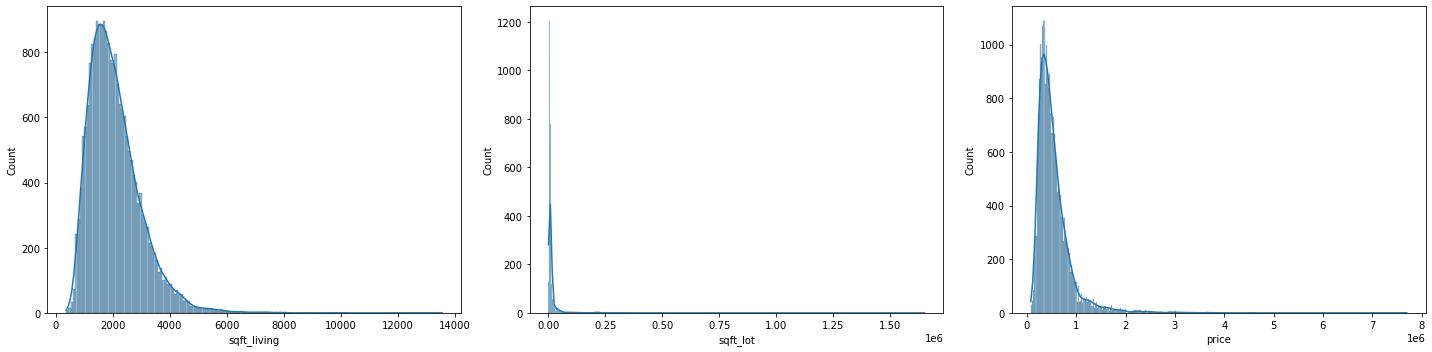

In [124]:
fig, axes = plt.subplots(1, 3, figsize = (20,5))
columns = ['sqft_living', 'sqft_lot','price']

sns.histplot(data=df1, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df1, x="sqft_lot", kde=True, ax=axes[1])
sns.histplot(data=df1, x="price", kde=True, ax=axes[2])

plt.tight_layout()
plt.show()

>We have positive skewness in our continuous variables
>
>- price
>- sqft_living
>- sqft_lot
>
>Positive skewness means that the tails of the distributions for these variables are longer on the right side (toward higher values), and most of the data points are concentrated on the left side (toward lower values).

**Model assumption: Linearity**

Identify which variables have a linear relationship with the target variable price

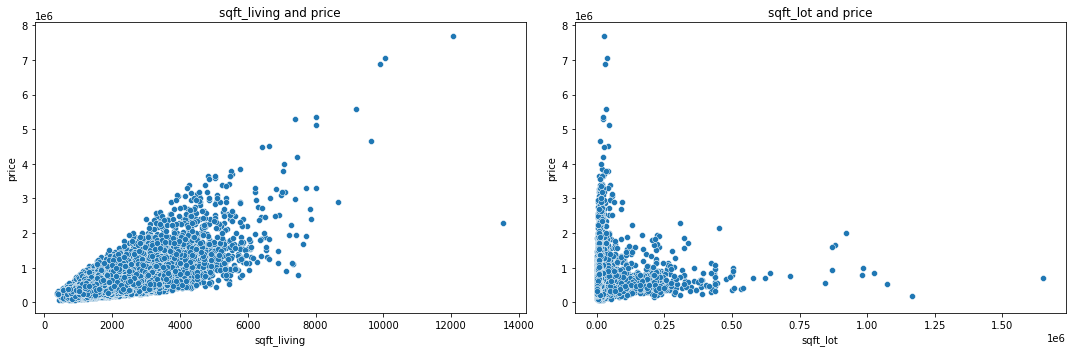

In [125]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

sns.scatterplot(x = df1['sqft_living'], y = df1['price'],ax=axes[0])
axes[0].set_title("sqft_living and price")

sns.scatterplot(x = df1['sqft_lot'], y = df1['price'],ax=axes[1])
axes[1].set_title("sqft_lot and price")

plt.tight_layout()
plt.show()

>* sqft_living shows a strong linear relationship with price.
>* sqft_lot shows a weak linear relationship with price.

**Model assumption: Normality**

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

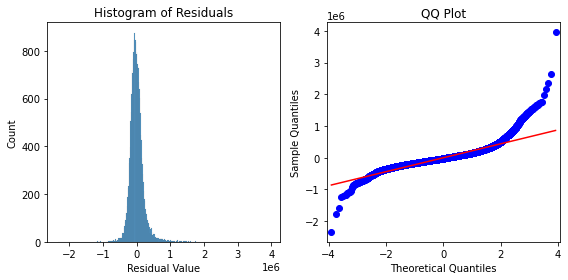

In [126]:
# Calculate the residuals.
residuals = model.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("QQ Plot")

plt.tight_layout()
plt.show()

>- I observe a mild positive skewness in the histogram, as well as heavier tails compared to the normal distribution
>- The residuals in the Q-Q plot appear to align quite closely with a straight line, indicating approximate normality. However, it's worth investigating the larger residuals to assess potential outliers.

**Model assumption: Constant variance**

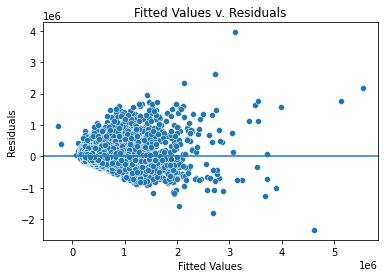

In [127]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)

plt.show()

>The variance of the residuals increases with X, indicating a violation of the constant variance assumption.

**Model assumption: No multicollinearity**

In [128]:
# Calculate the variance inflation factor (optional).

# variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# subset of the data with the continous independent variables. 
X = df1[['sqft_living','sqft_lot']]

# variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
sqft_living,1.167323
sqft_lot,1.167323


> Given that both "sqft_living" and "sqft_lot" have VIF values close to 1, it suggests that they are not highly correlated with each other or with other predictor variables in your regression model. This is a positive finding, as it indicates that multicollinearity is not a significant concern for these particular variables.

We will explore correlation.

In [129]:
df1.corr()

,price,sqft_living,sqft_lot,bedr_2,bedr_3,bedr_4,bedr_5,bedr_6,bedr_7,bedr_8,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
price,1.000000,0.701875,0.089111,-0.145404,-0.184011,0.177128,0.190248,0.089011,0.047059,0.037799,...,-0.031742,-0.083764,-0.208278,-0.317488,0.003728,0.235306,0.340775,0.357400,0.292087,0.212325
sqft_living,0.701875,1.000000,0.172586,-0.350934,-0.273668,0.352851,0.299061,0.149544,0.086769,0.046049,...,-0.054225,-0.125754,-0.311195,-0.360944,0.069881,0.318132,0.369381,0.345557,0.238121,0.144833
sqft_lot,0.089111,0.172586,1.000000,-0.027689,-0.015101,0.026349,0.011697,0.010002,0.005799,-0.003653,...,0.000416,0.023960,-0.018592,-0.067563,-0.024240,0.049805,0.073639,0.075682,0.062056,0.007759
bedr_2,-0.145404,-0.350934,-0.027689,1.000000,-0.349184,-0.262357,-0.108211,-0.042829,-0.016132,-0.009430,...,0.041592,0.107792,0.270069,0.017202,-0.085358,-0.109047,-0.077794,-0.049404,-0.020205,-0.009430
bedr_3,-0.184011,-0.273668,-0.015101,-0.349184,1.000000,-0.625604,-0.258034,-0.102129,-0.038468,-0.022487,...,-0.029775,-0.041778,-0.024330,0.158394,0.007568,-0.102115,-0.091608,-0.086951,-0.045415,-0.018680
bedr_4,0.177128,0.352851,0.026349,-0.262357,-0.625604,1.000000,-0.193872,-0.076734,-0.028903,-0.016895,...,-0.024357,-0.052793,-0.141184,-0.137792,0.057038,0.157623,0.112704,0.082025,0.031084,-0.004702
bedr_5,0.190248,0.299061,0.011697,-0.108211,-0.258034,-0.193872,1.000000,-0.031649,-0.011921,-0.006969,...,-0.010046,-0.021142,-0.067310,-0.060130,0.002657,0.064384,0.071250,0.071050,0.048736,0.036469
bedr_6,0.089011,0.149544,0.010002,-0.042829,-0.102129,-0.076734,-0.031649,1.000000,-0.004718,-0.002758,...,-0.003976,0.000427,-0.027149,-0.015405,0.014326,0.000981,0.015153,0.025399,0.012620,0.048689
bedr_7,0.047059,0.086769,0.005799,-0.016132,-0.038468,-0.028903,-0.011921,-0.004718,1.000000,-0.001039,...,-0.001498,-0.004430,-0.009693,-0.010739,0.003163,-0.002115,0.014865,0.027157,0.014636,-0.001039
bedr_8,0.037799,0.046049,-0.003653,-0.009430,-0.022487,-0.016895,-0.006969,-0.002758,-0.001039,1.000000,...,-0.000875,-0.002590,-0.007897,0.002328,0.001406,-0.003373,0.002664,-0.003382,0.028053,-0.000607


In [130]:
abs(df1.corr()) > 0.75

,price,sqft_living,sqft_lot,bedr_2,bedr_3,bedr_4,bedr_5,bedr_6,bedr_7,bedr_8,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_5,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_6,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_7,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
bedr_8,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [131]:
df=df1.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)

In [132]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(cond_3, cond_4)",0.813095


>The correlation coefficient between "cond_4" and "cond_3" is approximately 0.813095. This indicates a strong positive linear relationship or correlation between these two variables.

___
### Iteration 2

**Adjustments**: Addressing issues in Iteration 1 (First Model)
1. Despite sqft_lot's weak linear relationship with price, we retain it due to prior variable reductions in our smaller dataset.
2. We'll drop cond_4, cond_3 as we've seen in the correlation table.
3. Regarding normality, we will investigate the presence of outliers and take steps to address them.
4. We will apply Log Transformation to handle the distribution and skewness of our data.

In [133]:
# droppping 'cond_4', 'cond_3'
df2 = df1.drop(columns=['cond_4', 'cond_3'])

**Relevant continues variables vs the dependent variable**

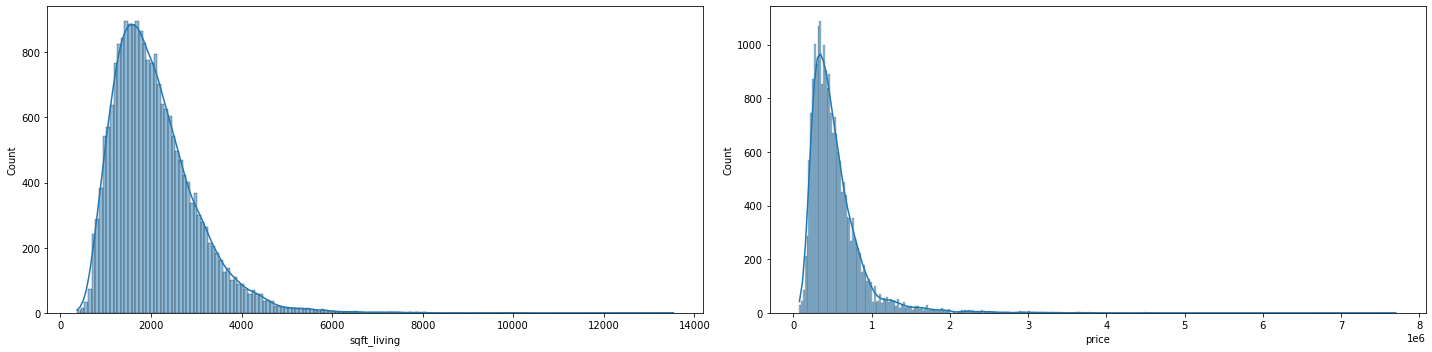

In [134]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

sns.histplot(data=df2, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df2, x="price", kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

> Rechecking the skewness in our continuous variables. We plot this to see the changes after log trasnformation. But before applying the log transformation, our next step is to address outliers in the data.

**Taking outliers**

In [135]:
# Taking outliers by reducing data size to 3 standard deviations

filter_cols = ['sqft_living', 'price', 'sqft_lot']

df2 = df2[~df2[filter_cols].apply(lambda x: np.abs(x - x.mean()) > 3 * x.std()).any(axis=1)]

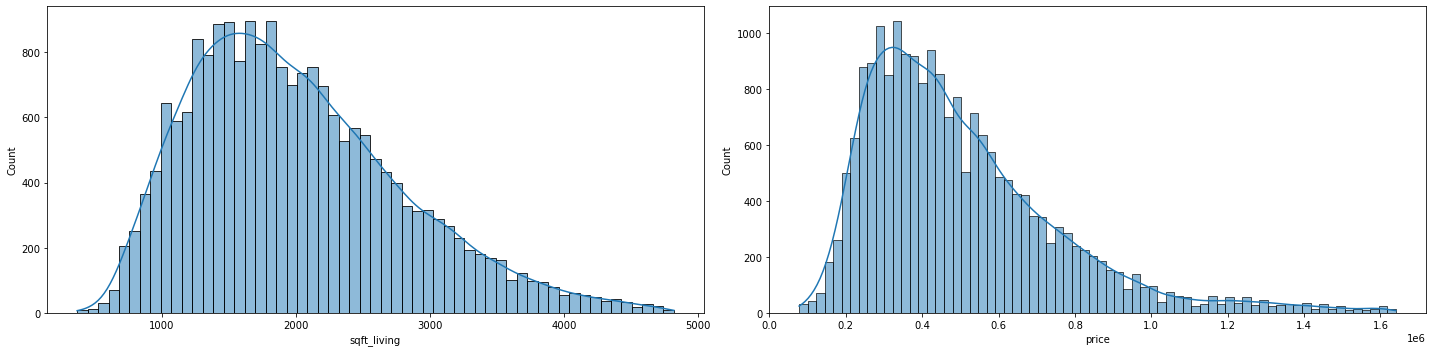

In [136]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

sns.histplot(data=df2, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df2, x="price", kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

>Simply by reducing the data size to exclude values beyond three standard deviations, we've observed an improvement in our dataset

**Log Transformation**

In [137]:
df2['sqft_living'] = np.log(df2['sqft_living'])
df2['price'] = np.log(df2['price'])

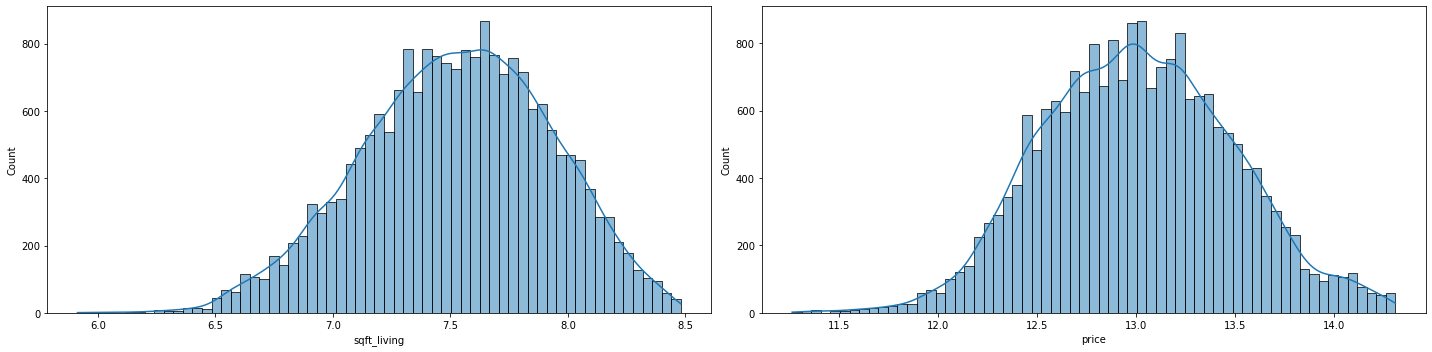

In [138]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

sns.histplot(data=df2, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df2, x="price", kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

> Applying a log transformation to our data has significantly improved its skewness

**Standardisation (Z-score Normalisation)**

Scaling and centering the data using Z-score normalization, also known as standard scaling

In [139]:
# normalize (subract mean and divide by std)

df2['sqft_living'] = (df2['sqft_living'] - df2['sqft_living'].mean()) / df2['sqft_living'].std()
df2['price'] = (df2['price'] - df2['price'].mean()) / df2['price'].std()

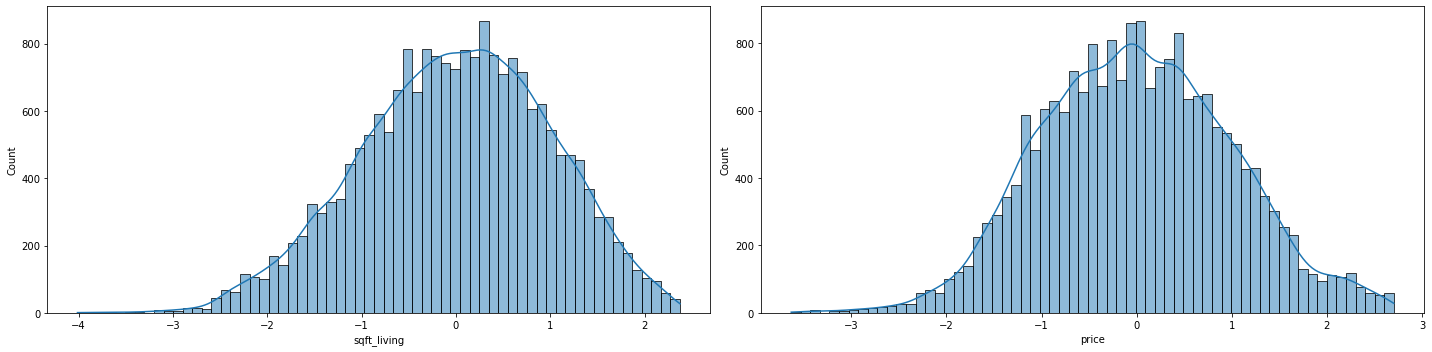

In [140]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

sns.histplot(data=df2, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df2, x="price", kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

> It's important to note that standardization doesn't change the shape of the data's distribution; it only scales and centers the data.

In [141]:
# Doing the second iteration
X2 = df2.drop(['price'], axis = 1)
X2_columns = "+".join(X2.columns)

In [142]:
ols_formula = Y + "~" + X2_columns

OLS = ols(formula = ols_formula, data = df2)
model2 = OLS.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     656.9
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:52:47   Log-Likelihood:                -21638.
No. Observations:               20586   AIC:                         4.335e+04
Df Residuals:                   20551   BIC:                         4.362e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.8668      0.776     -1.118      0.264      -2.387       0.653
sqft_living     0.4068      0.010     42.241      0.000       0.388       0.426
sqft_lot    -2.296e-06   3.73e-07     -6.150      0.000   -3.03e-06   -1.56e-06
bedr_2         -0.1296      0.054     -2.401      0.016      -0.235      -0.024
bedr_3         -0.4244      0.054     -7.808      0.000      -0.531      -0.318
bedr_4         -0.4570      0.056     -8.181      0.000      -0.566      -0.347
bedr_5         -0.4287      0.059     -7.264      0.000      -0.544      -0.313
bedr_6         -0.4187      0.073     -5.715      0.000      -0.562      -0.275
bedr_7         -0.4999      0.145     -3.439      0.001      -0.785      -0.215
bedr_8         -0.3975      0.239     -1.663      0.096      -0.866       0.071
bedr_9          0.2240      0.316      0.710      0.478      -0.395       0.843
bedr_10         0.0989      0.409      0.242      0.809      -0.702       0.900
bedr_11        -0.3908      0.695     -0.562      0.574      -1.754       0.972
bathr_1         0.6676      0.347      1.924      0.054      -0.012       1.348
bathr_2         0.5423      0.347      1.563      0.118      -0.138       1.223
bathr_3         0.6631      0.347      1.908      0.056      -0.018       1.344
bathr_4         0.7395      0.348      2.124      0.034       0.057       1.422
bathr_5         0.5548      0.390      1.423      0.155      -0.209       1.319
bathr_6         0.2609      0.786      0.332      0.740      -1.281       1.802
bathr_7     -1.835e-14    2.4e-14     -0.764      0.445   -6.54e-14    2.87e-14
bathr_8        -0.5528      0.835     -0.662      0.508      -2.189       1.084
floors_2        0.0050      0.011      0.448      0.654      -0.017       0.027
floors_3        0.2033      0.031      6.591      0.000       0.143       0.264
floors_4        0.2363      0.283      0.834      0.404      -0.319       0.792
waterfr_1       1.0492      0.079     13.207      0.000       0.894       1.205
cond_2         -0.3173      0.057     -5.575      0.000      -0.429      -0.206
cond_5          0.4050      0.018     22.272      0.000       0.369       0.441
grade_4        -0.3390      0.706     -0.480      0.631      -1.724       1.046
grade_5        -0.3343      0.696     -0.480      0.631      -1.699       1.030
grade_6         0.0237      0.695      0.034      0.973      -1.339       1.386
grade_7         0.4286      0.695      0.616      0.538      -0.934       1.791
grade_8         0.8123      0.695      1.168      0.243      -0.551       2.175
grade_9         1.2413      0.696      1.784      0.074      -0.122       2.605
grade_10        1.5428      0.696      2.217      0.027       0.179       2.907
grade_11        1.7867      0.697      2.562      0.010       0.420       3.154
grade_12        2.1116      0.711      2.96

> As we dropped some features, there was a reduction in both the R-squared and adjusted R-squared values. However, this step allowed us to successfully improve the skewness of our data. It's worth noting that the kurtosis value of 3.300 suggests that the data may exhibit slightly heavier tails compared to a normal distribution, although this departure from normality is not highly pronounced

**Model assumption: Linearity**

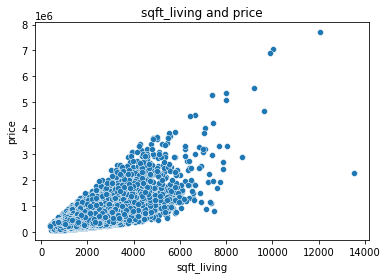

In [143]:
fig = sns.scatterplot(x = df1['sqft_living'], y = df1['price'])
fig.set_title("sqft_living and price")

plt.show()

>The relationship between sqft_living and price continues to exhibit a strong linear correlation.

**Model assumption: Normality**

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

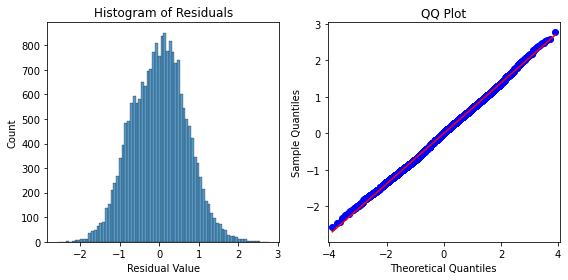

In [144]:
# Calculate the residuals.
residuals = model2.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("QQ Plot")

plt.tight_layout()
plt.show()

>- The histogram of residuals has shown significant improvement, with a notable reduction in heavy tails.
>- Also, the QQ plot now exhibits a smoother and closer alignment between sample quantiles and theoretical quantiles, forming a more linear relationship.
>- But the QQ plot displays some data points that could potentially be outliers

**Model assumption: Constant variance**

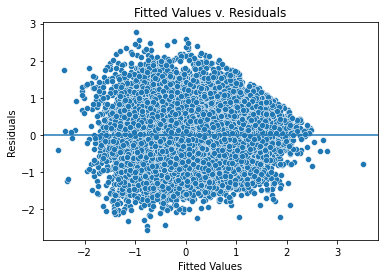

In [145]:
fig = sns.scatterplot(x = model2.fittedvalues, y = model2.resid)

fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)

plt.show()

>The scattered variance aligns with the homoscedasticity assumptions

**Model assumption: No multicollinearity**

In [146]:
df2.corr()

,price,sqft_living,sqft_lot,bedr_2,bedr_3,bedr_4,bedr_5,bedr_6,bedr_7,bedr_8,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
price,1.000000,0.630802,0.100389,-0.175266,-0.172025,0.229912,0.155009,0.054669,0.019474,0.009703,...,-0.064122,-0.153711,-0.318627,-0.318701,0.159188,0.345456,0.309631,0.189261,0.077060,NaN
sqft_living,0.630802,1.000000,0.211168,-0.450103,-0.206560,0.413036,0.262806,0.112545,0.045301,0.027338,...,-0.094532,-0.183717,-0.400988,-0.300736,0.193076,0.360491,0.310124,0.185281,0.070070,NaN
sqft_lot,0.100389,0.211168,1.000000,-0.080162,-0.018813,0.061550,0.027746,0.010126,0.002489,-0.004794,...,0.013036,0.016684,-0.025726,-0.086527,-0.022008,0.072837,0.117852,0.087119,0.039233,NaN
bedr_2,-0.175266,-0.450103,-0.080162,1.000000,-0.359625,-0.263873,-0.105973,-0.040926,-0.014336,-0.008124,...,0.041596,0.105071,0.267468,0.009710,-0.091283,-0.110037,-0.070783,-0.038685,-0.012705,NaN
bedr_3,-0.172025,-0.206560,-0.018813,-0.359625,1.000000,-0.628897,-0.252568,-0.097540,-0.034167,-0.019362,...,-0.030858,-0.042705,-0.029141,0.148323,-0.002103,-0.108135,-0.079513,-0.061208,-0.015370,NaN
bedr_4,0.229912,0.413036,0.061550,-0.263873,-0.628897,1.000000,-0.185321,-0.071570,-0.025070,-0.014207,...,-0.024617,-0.052715,-0.140657,-0.132936,0.065000,0.164536,0.108497,0.077242,0.016164,NaN
bedr_5,0.155009,0.262806,0.027746,-0.105973,-0.252568,-0.185321,1.000000,-0.028743,-0.010068,-0.005705,...,-0.009887,-0.019647,-0.064806,-0.048150,0.014432,0.067903,0.061360,0.033659,0.020353,NaN
bedr_6,0.054669,0.112545,0.010126,-0.040926,-0.097540,-0.071570,-0.028743,1.000000,-0.003888,-0.002203,...,-0.003818,0.002267,-0.026395,-0.005276,0.021328,0.004401,-0.002482,-0.001745,-0.003446,NaN
bedr_7,0.019474,0.045301,0.002489,-0.014336,-0.034167,-0.025070,-0.010068,-0.003888,1.000000,-0.000772,...,-0.001337,-0.003897,-0.007542,-0.002579,0.008475,0.002694,-0.001603,-0.003809,-0.001207,NaN
bedr_8,0.009703,0.027338,-0.004794,-0.008124,-0.019362,-0.014207,-0.005705,-0.002203,-0.000772,1.000000,...,-0.000758,-0.002208,-0.006811,0.010114,0.002056,-0.007694,-0.004523,-0.002159,-0.000684,NaN


In [147]:
abs(df2.corr()) > 0.75

,price,sqft_living,sqft_lot,bedr_2,bedr_3,bedr_4,bedr_5,bedr_6,bedr_7,bedr_8,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_5,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_6,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_7,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
bedr_8,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [148]:
df=df2.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)

In [149]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,


> There are no two highly correlated independent variables, which is in line with the assumption of no multicollinearity

---
### Iteration 3


>We will initiate another iteration to address the minor outlier issues and subsequently compare the results.

In [150]:
df3 = df2.copy()

In [151]:
# Reduce outliers by reducing data size to 2 standard deviations

column= ['price', 'sqft_living']

df3 = df3[~df3[column].apply(lambda x: np.abs(x - x.mean()) > 2 * x.std()).any(axis=1)]

In [152]:
X3 = df3.drop(['price'], axis = 1)
X3_columns = "+".join(X3.columns)

In [153]:
ols_formula = Y + "~" + X3_columns

OLS = ols(formula = ols_formula, data = df3)
model3 = OLS.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     448.0
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:53:02   Log-Likelihood:                -18816.
No. Observations:               18974   AIC:                         3.770e+04
Df Residuals:                   18940   BIC:                         3.797e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1436      0.355     -0.404      0.686      -0.840       0.553
sqft_living     0.3761      0.010     38.860      0.000       0.357       0.395
sqft_lot    -1.569e-06   3.69e-07     -4.252      0.000   -2.29e-06   -8.46e-07
bedr_2         -0.0611      0.081     -0.751      0.453      -0.220       0.098
bedr_3         -0.3429      0.081     -4.244      0.000      -0.501      -0.185
bedr_4         -0.3703      0.082     -4.544      0.000      -0.530      -0.211
bedr_5         -0.3695      0.084     -4.418      0.000      -0.533      -0.206
bedr_6         -0.3080      0.094     -3.280      0.001      -0.492      -0.124
bedr_7         -0.3299      0.157     -2.103      0.035      -0.637      -0.022
bedr_8         -0.1115      0.247     -0.452      0.651      -0.595       0.372
bedr_9          0.3054      0.386      0.791      0.429      -0.452       1.063
bedr_10         0.1981      0.469      0.422      0.673      -0.722       1.118
bedr_11        -0.2653      0.658     -0.403      0.687      -1.556       1.025
bathr_1         0.5892      0.378      1.558      0.119      -0.152       1.330
bathr_2         0.4314      0.378      1.141      0.254      -0.310       1.173
bathr_3         0.5370      0.378      1.419      0.156      -0.205       1.279
bathr_4         0.5988      0.379      1.579      0.114      -0.144       1.342
bathr_5         0.3321      0.428      0.776      0.438      -0.507       1.171
bathr_6         0.1191      0.766      0.155      0.877      -1.383       1.621
bathr_7      9.523e-16   6.97e-16      1.367      0.172   -4.13e-16    2.32e-15
bathr_8        -0.6130      0.844     -0.727      0.467      -2.267       1.040
floors_2        0.0124      0.011      1.145      0.252      -0.009       0.034
floors_3        0.2040      0.030      6.824      0.000       0.145       0.263
floors_4        0.2516      0.267      0.943      0.346      -0.272       0.775
waterfr_1       0.8484      0.095      8.967      0.000       0.663       1.034
cond_2         -0.2420      0.063     -3.826      0.000      -0.366      -0.118
cond_5          0.3760      0.018     20.905      0.000       0.341       0.411
grade_4        -1.5216      0.593     -2.567      0.010      -2.683      -0.360
grade_5        -0.8969      0.115     -7.767      0.000      -1.123      -0.671
grade_6        -0.6231      0.102     -6.116      0.000      -0.823      -0.423
grade_7        -0.2683      0.101     -2.659      0.008      -0.466      -0.071
grade_8         0.1006      0.101      0.998      0.318      -0.097       0.298
grade_9         0.4732      0.101      4.669      0.000       0.275       0.672
grade_10        0.7082      0.103      6.857      0.000       0.506       0.911
grade_11        0.9002      0.117      7.692      0.000       0.671       1.130
grade_12        0.9841      0.593      1.66

> We didn't achieve substantial improvements apart from slighty improvements on skewness and kurtosis. However, both the R-squared and the adjusted R-squared decreased in value.

**Model assumption: Normality**

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

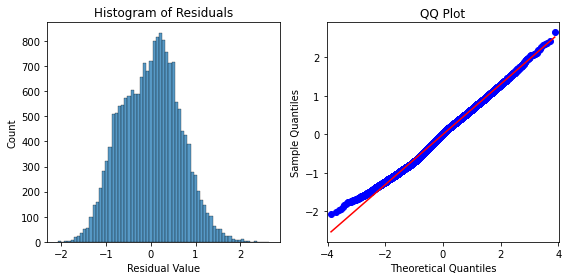

In [154]:
# Calculate the residuals.
residuals = model3.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("QQ Plot")

plt.tight_layout()
plt.show()

>- The histogram of residuals continues to exhibit normality. 
>- Additionally, the QQ plot still reveals some data points that might be considered potential outliers.

> Since we haven't seen significant improvements, I'm planning to use our second model for validation. This choice is because the second model has higher R-squared and adjusted R-squared values compared to the third model. Additionally, it successfully satisfies all the assumption requirements essential for multiple linear 

---
### Model Validation

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df2.drop('price', axis=1)
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 0.47768211718524145
Test Mean Squared Error:  0.4850472416286742


> Since the training and testing MSE values are quite close, it suggests that the model is achieving a reasonable balance between fitting the training data and generalizing to unseen data. This is a positive sign, indicating that the model is not strongly overfitting or underfitting the data. 

In [156]:
# Using K-Fold Cross Validation to verify

X = df2.drop('price', axis=1)
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

scoring = {'mse': 'neg_mean_squared_error'}
results = cross_validate(linreg, X, y, scoring=scoring, cv=10)

test_mse_scores = -results['test_mse']

train_predictions = linreg.predict(X)
train_mse = mean_squared_error(y, train_predictions)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse_scores.mean())

Train Mean Squared Error: 0.4795235771828296
Test Mean Squared Error: 0.4819121843130844


> The K-Fold Cross-Validation consistently shows that the model maintains a small difference between training and testing Mean Squared Error (MSE) values. This indicates a balanced approach, where the model effectively learns from the training data while generalizing well to unseen data. This result is encouraging, as it suggests the model neither overfits nor underfits the dataset but rather provides a robust fit to the underlying patterns, instilling confidence in its predictive performance

In [157]:
# Display model 2 summary for interpretation
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     656.9
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:53:13   Log-Likelihood:                -21638.
No. Observations:               20586   AIC:                         4.335e+04
Df Residuals:                   20551   BIC:                         4.362e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.8668      0.776     -1.118      0.264      -2.387       0.653
sqft_living     0.4068      0.010     42.241      0.000       0.388       0.426
sqft_lot    -2.296e-06   3.73e-07     -6.150      0.000   -3.03e-06   -1.56e-06
bedr_2         -0.1296      0.054     -2.401      0.016      -0.235      -0.024
bedr_3         -0.4244      0.054     -7.808      0.000      -0.531      -0.318
bedr_4         -0.4570      0.056     -8.181      0.000      -0.566      -0.347
bedr_5         -0.4287      0.059     -7.264      0.000      -0.544      -0.313
bedr_6         -0.4187      0.073     -5.715      0.000      -0.562      -0.275
bedr_7         -0.4999      0.145     -3.439      0.001      -0.785      -0.215
bedr_8         -0.3975      0.239     -1.663      0.096      -0.866       0.071
bedr_9          0.2240      0.316      0.710      0.478      -0.395       0.843
bedr_10         0.0989      0.409      0.242      0.809      -0.702       0.900
bedr_11        -0.3908      0.695     -0.562      0.574      -1.754       0.972
bathr_1         0.6676      0.347      1.924      0.054      -0.012       1.348
bathr_2         0.5423      0.347      1.563      0.118      -0.138       1.223
bathr_3         0.6631      0.347      1.908      0.056      -0.018       1.344
bathr_4         0.7395      0.348      2.124      0.034       0.057       1.422
bathr_5         0.5548      0.390      1.423      0.155      -0.209       1.319
bathr_6         0.2609      0.786      0.332      0.740      -1.281       1.802
bathr_7     -1.835e-14    2.4e-14     -0.764      0.445   -6.54e-14    2.87e-14
bathr_8        -0.5528      0.835     -0.662      0.508      -2.189       1.084
floors_2        0.0050      0.011      0.448      0.654      -0.017       0.027
floors_3        0.2033      0.031      6.591      0.000       0.143       0.264
floors_4        0.2363      0.283      0.834      0.404      -0.319       0.792
waterfr_1       1.0492      0.079     13.207      0.000       0.894       1.205
cond_2         -0.3173      0.057     -5.575      0.000      -0.429      -0.206
cond_5          0.4050      0.018     22.272      0.000       0.369       0.441
grade_4        -0.3390      0.706     -0.480      0.631      -1.724       1.046
grade_5        -0.3343      0.696     -0.480      0.631      -1.699       1.030
grade_6         0.0237      0.695      0.034      0.973      -1.339       1.386
grade_7         0.4286      0.695      0.616      0.538      -0.934       1.791
grade_8         0.8123      0.695      1.168      0.243      -0.551       2.175
grade_9         1.2413      0.696      1.784      0.074      -0.122       2.605
grade_10        1.5428      0.696      2.217      0.027       0.179       2.907
grade_11        1.7867      0.697      2.562      0.010       0.420       3.154
grade_12        2.1116      0.711      2.96

---
### Interpretretation

- For each additional square foot of living space, the estimated property price increases by 378.80 .
- Each additional bathroom adds approximately 686.40 USD to the property price.
- Properties with a waterfront view command a premium of 931,200 USD.
- A property with a grade of 10, compared to a grade of 3, is estimated to be worth 1,886,600 USD more.
- Older properties, built in 1900, may be valued at 678.20 USD less compared to more recent ones.

---
### Conclusion

- Property size, bedrooms, bathrooms, floors, waterfront views, condition, grade, and year built significantly influence property prices in King County.
- Waterfront views, higher grades, more bathrooms, and newer properties tend to command higher prices.
- The number of bedrooms, lot size, and condition 2 can reduce property values.
- Historical year built is associated with property value, with older properties generally valued lower.

---
### Recommendations:

- Develop a user-friendly online tool that allows users to estimate property values based on the regression model's coefficients. Provide an intuitive interface for easy access.

- Incorporate real-time data to provide users with up-to-date market trend analysis, helping them make timely investment decisions.

- Offer on-demand consultations with real estate experts who can provide personalized advice based on the regression model's insights.

- Provide educational content on the platform to help users understand the factors affecting property prices and how to use the valuation tool effectively.

- Consider offering premium subscription services for advanced features, including historical data access and investment strategy recommendations.

---
### Future Work:

In the pursuit of continuous improvement, future iterations of this project will involve incorporating all available features from the dataset to further enhance the predictive accuracy of the model. 

Additionally, there is a potential avenue for exploring the impact of various amenities, such as proximity to schools, parks, and transportation hubs, on property prices. This expanded scope will provide a more comprehensive understanding of the King County real estate market and ensure that the "King County Real Estate Pricing and Investment Advisor" remains an invaluable resource for all real estate stakeholders.